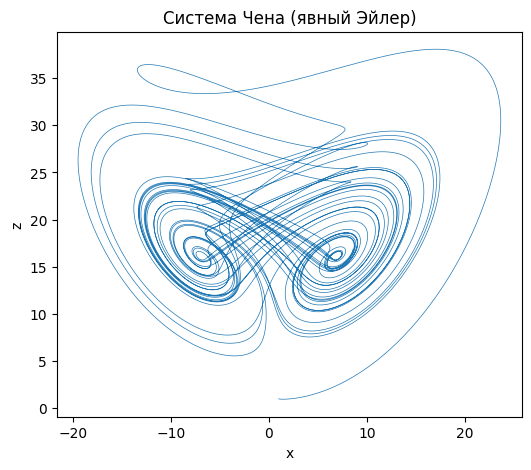

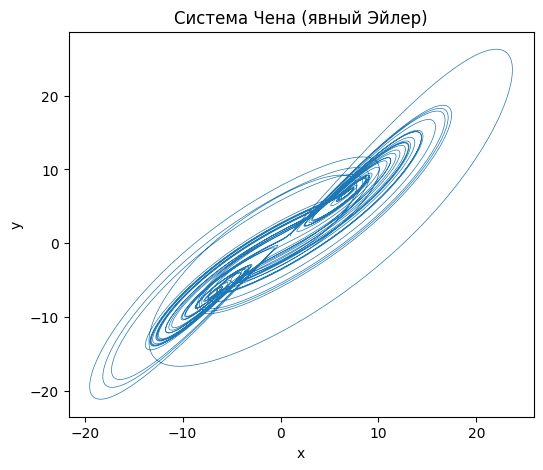

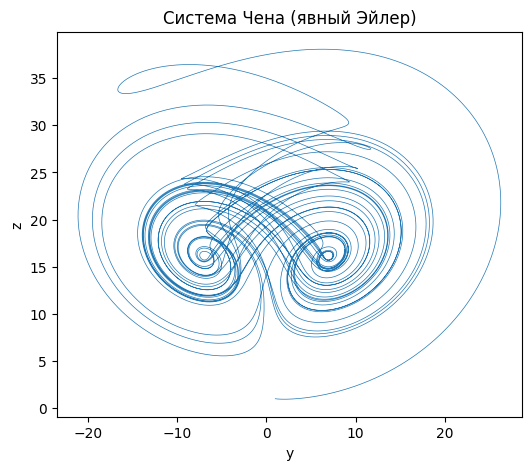

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# параметры системы Чена
a, b, c = 40, 3, 28

# правая часть системы
def chen_system(x, y, z):
    dx = a * (y - x)
    dy = (c - a) * x - x * z + c * y
    dz = x * y - b * z
    return dx, dy, dz

# явный метод Эйлера
def euler_explicit(x0, y0, z0, h, n_steps):
    xs, ys, zs = [x0], [y0], [z0]
    x, y, z = x0, y0, z0
    for _ in range(n_steps):
        dx, dy, dz = chen_system(x, y, z)
        x = x + h * dx
        y = y + h * dy
        z = z + h * dz
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return np.array(xs), np.array(ys), np.array(zs)

# начальные условия
x0, y0, z0 = 1, 1, 1
h = 0.001        # шаг интегрирования
T = 30           # время моделирования
n_steps = int(T / h)

# решение
xs, ys, zs = euler_explicit(x0, y0, z0, h, n_steps)

# фазовый портрет (x, z)
plt.figure(figsize=(6,5))
plt.plot(xs, zs, lw=0.5)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Система Чена (явный Эйлер)")
plt.show()

# фазовый портрет (x, y)
plt.figure(figsize=(6,5))
plt.plot(xs, ys, lw=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Система Чена (явный Эйлер)")
plt.show()

# фазовый портрет (y, z)
plt.figure(figsize=(6,5))
plt.plot(ys, zs, lw=0.5)
plt.xlabel("y")
plt.ylabel("z")
plt.title("Система Чена (явный Эйлер)")
plt.show()

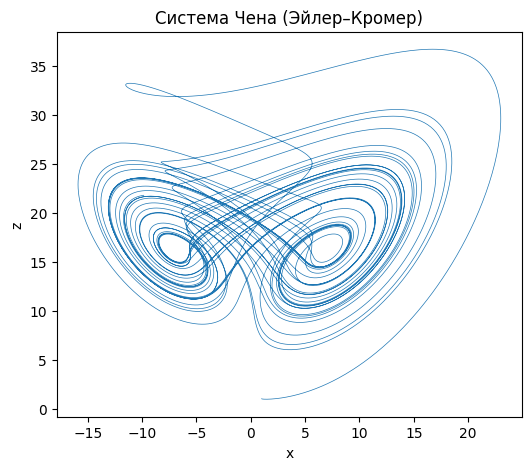

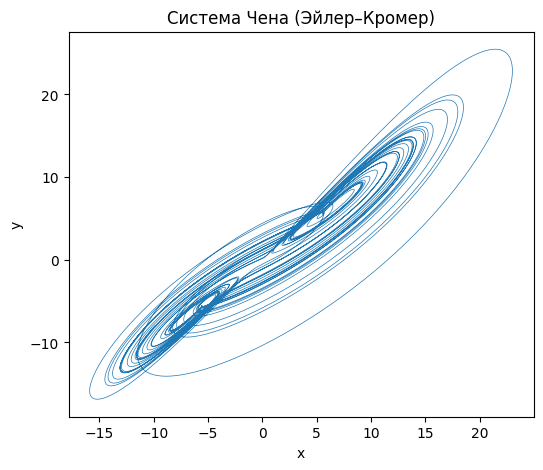

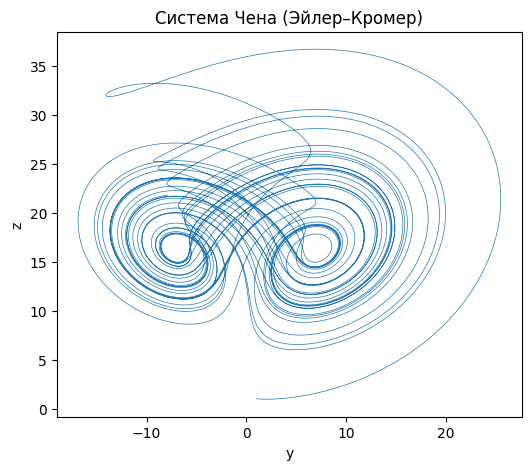

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# параметры системы Чена
a, b, c = 40, 3, 28

# правая часть системы
def chen_system(x, y, z):
    dx = a * (y - x)
    dy = (c - a) * x - x * z + c * y
    dz = x * y - b * z
    return dx, dy, dz

# метод Эйлера-Кромера
def euler_cromer(x0, y0, z0, h, n_steps):
    xs, ys, zs = [x0], [y0], [z0]
    x, y, z = x0, y0, z0
    for _ in range(n_steps):
        dx, _, _ = chen_system(x, y, z)
        x_new = x + h * dx

        _, dy, _ = chen_system(x_new, y, z)  # x уже обновлён
        y_new = y + h * dy

        _, _, dz = chen_system(x_new, y_new, z)  # x и y обновлены
        z_new = z + h * dz

        x, y, z = x_new, y_new, z_new
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return np.array(xs), np.array(ys), np.array(zs)

# начальные условия
x0, y0, z0 = 1, 1, 1
h = 0.001      # шаг интегрирования
T = 30
n_steps = int(T / h)

# решение
xs, ys, zs = euler_cromer(x0, y0, z0, h, n_steps)

# фазовый портрет (x, z)
plt.figure(figsize=(6,5))
plt.plot(xs, zs, lw=0.5)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Система Чена (Эйлер–Кромер)")
plt.show()

# фазовый портрет (x, y)
plt.figure(figsize=(6,5))
plt.plot(xs, ys, lw=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Система Чена (Эйлер–Кромер)")
plt.show()

# фазовый портрет (y, z)
plt.figure(figsize=(6,5))
plt.plot(ys, zs, lw=0.5)
plt.xlabel("y")
plt.ylabel("z")
plt.title("Система Чена (Эйлер–Кромер)")
plt.show()

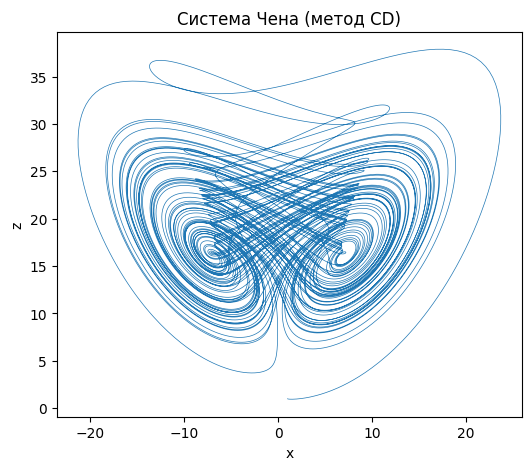

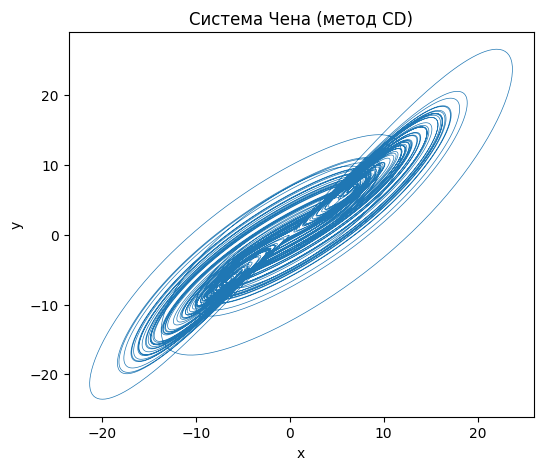

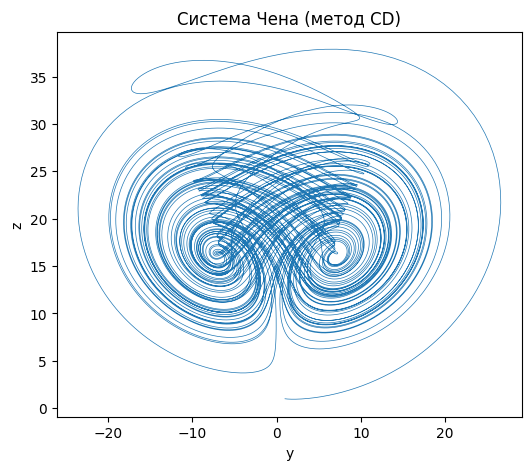

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# параметры системы Чена
a, b, c = 40, 3, 28

# шаг CD-метода (Composite-Diagonal)
def cd_step(x, y, z, h, a=40, b=3, c=28):
    # --- Шаг D1 ---
    x1 = (x + h * a * y) / (1 + h * a)
    y1 = (y + h * ((c - a) * x1 - x1 * z)) / (1 - h * c)
    z1 = (z + h * x1 * y1) / (1 + h * b)

    # --- Шаг D2 ---
    z2 = (z1 + h * x1 * y1) / (1 + h * b)
    y2 = (y1 + h * ((c - a) * x1 - x1 * z2)) / (1 - h * c)
    x2 = (x1 + h * a * y2) / (1 + h * a)

    return x2, y2, z2

# интегратор методом CD
def integrate_cd(x0, y0, z0, h, T):
    n_steps = int(T / h)
    xs, ys, zs = [x0], [y0], [z0]
    x, y, z = x0, y0, z0
    for _ in range(n_steps):
        x, y, z = cd_step(x, y, z, h, a, b, c)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return np.array(xs), np.array(ys), np.array(zs)

# начальные условия
x0, y0, z0 = 1, 1, 1
h = 0.001   # шаг интегрирования
T = 30

# решение
xs, ys, zs = integrate_cd(x0, y0, z0, h, T)

# фазовый портрет (x, z)
plt.figure(figsize=(6,5))
plt.plot(xs, zs, lw=0.5)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Система Чена (метод CD)")
plt.show()

# фазовый портрет (x, y)
plt.figure(figsize=(6,5))
plt.plot(xs, ys, lw=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Система Чена (метод CD)")
plt.show()

# фазовый портрет (y, z)
plt.figure(figsize=(6,5))
plt.plot(ys, zs, lw=0.5)
plt.xlabel("y")
plt.ylabel("z")
plt.title("Система Чена (метод CD)")
plt.show()

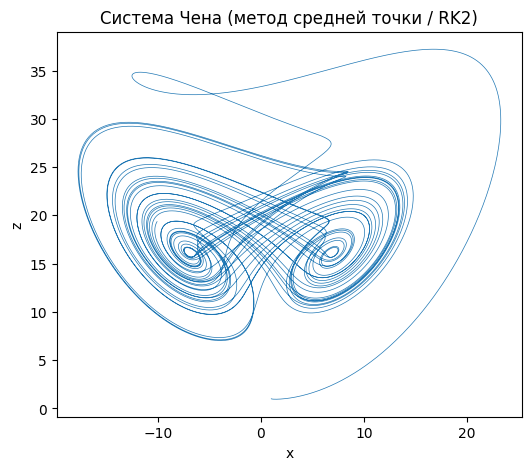

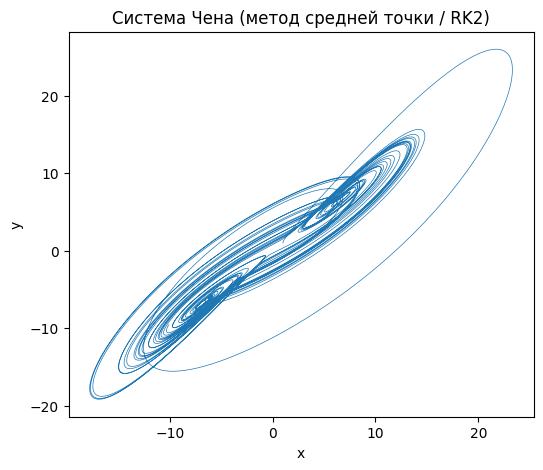

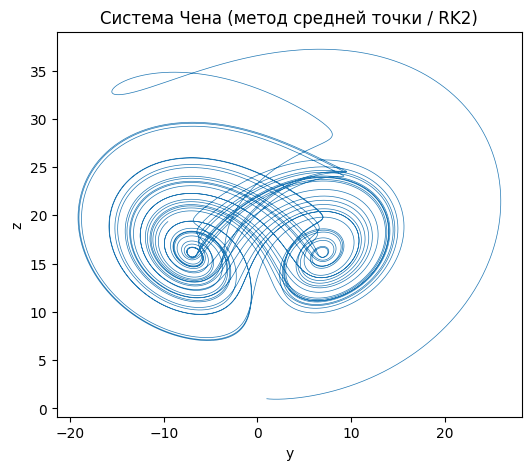

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# параметры системы Чена
a, b, c = 40, 3, 28

# правая часть системы (dx/dt, dy/dt, dz/dt)
def chen_system(x, y, z):
    dx = a * (y - x)
    dy = (c - a) * x - x * z + c * y
    dz = x * y - b * z
    return np.array([dx, dy, dz])

# метод средней точки (RK2 midpoint)
def integrate_midpoint(x0, y0, z0, h, T):
    n_steps = int(T / h)
    xs, ys, zs = [x0], [y0], [z0]
    state = np.array([x0, y0, z0], dtype=float)

    for _ in range(n_steps):
        k1 = chen_system(*state)
        k2 = chen_system(*(state + 0.5*h*k1))
        state = state + h * k2
        xs.append(state[0])
        ys.append(state[1])
        zs.append(state[2])

    return np.array(xs), np.array(ys), np.array(zs)

# начальные условия
x0, y0, z0 = 1, 1, 1
h = 0.001
T = 30

# решение
xs, ys, zs = integrate_midpoint(x0, y0, z0, h, T)

# фазовый портрет (x, z)
plt.figure(figsize=(6,5))
plt.plot(xs, zs, lw=0.5)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Система Чена (метод средней точки / RK2)")
plt.show()

# фазовый портрет (x, y)
plt.figure(figsize=(6,5))
plt.plot(xs, ys, lw=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Система Чена (метод средней точки / RK2)")
plt.show()

# фазовый портрет (y, z)
plt.figure(figsize=(6,5))
plt.plot(ys, zs, lw=0.5)
plt.xlabel("y")
plt.ylabel("z")
plt.title("Система Чена (метод средней точки / RK2)")
plt.show()

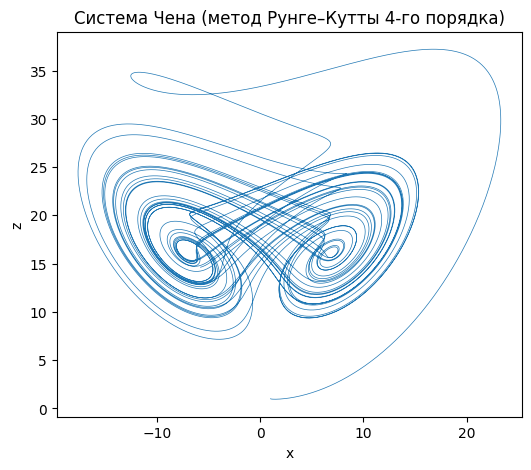

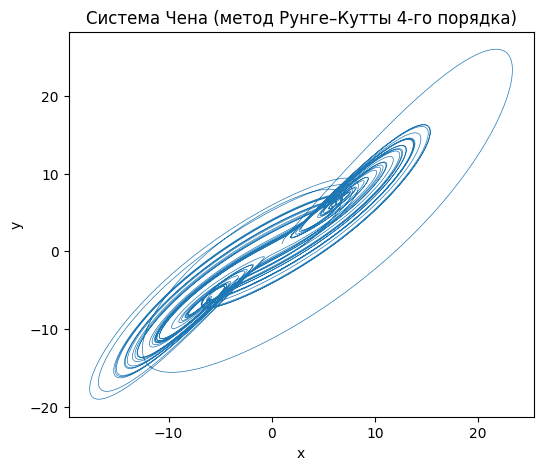

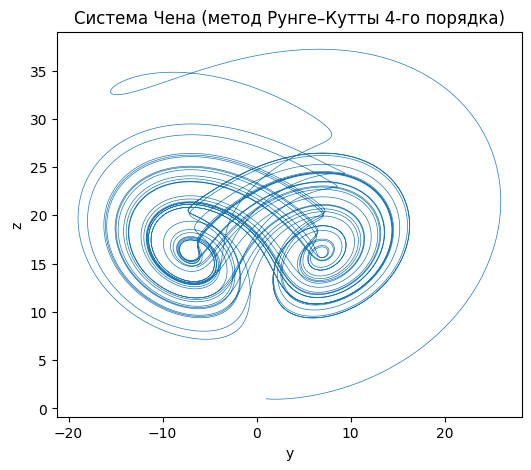

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# параметры системы Чена
a, b, c = 40, 3, 28

# правая часть системы
def chen_system(x, y, z):
    dx = a * (y - x)
    dy = (c - a) * x - x * z + c * y
    dz = x * y - b * z
    return np.array([dx, dy, dz])

# метод Рунге–Кутты 4-го порядка
def integrate_rk4(x0, y0, z0, h, T):
    n_steps = int(T / h)
    xs, ys, zs = [x0], [y0], [z0]
    state = np.array([x0, y0, z0], dtype=float)

    for _ in range(n_steps):
        k1 = chen_system(*state)
        k2 = chen_system(*(state + 0.5*h*k1))
        k3 = chen_system(*(state + 0.5*h*k2))
        k4 = chen_system(*(state + h*k3))
        state = state + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
        xs.append(state[0])
        ys.append(state[1])
        zs.append(state[2])

    return np.array(xs), np.array(ys), np.array(zs)

# начальные условия
x0, y0, z0 = 1, 1, 1
h = 0.001
T = 30

# решение
xs, ys, zs = integrate_rk4(x0, y0, z0, h, T)

# фазовый портрет (x, z)
plt.figure(figsize=(6,5))
plt.plot(xs, zs, lw=0.5)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Система Чена (метод Рунге–Кутты 4-го порядка)")
plt.show()

# фазовый портрет (x, y)
plt.figure(figsize=(6,5))
plt.plot(xs, ys, lw=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Система Чена (метод Рунге–Кутты 4-го порядка)")
plt.show()

# фазовый портрет (y, z)
plt.figure(figsize=(6,5))
plt.plot(ys, zs, lw=0.5)
plt.xlabel("y")
plt.ylabel("z")
plt.title("Система Чена (метод Рунге–Кутты 4-го порядка)")
plt.show()

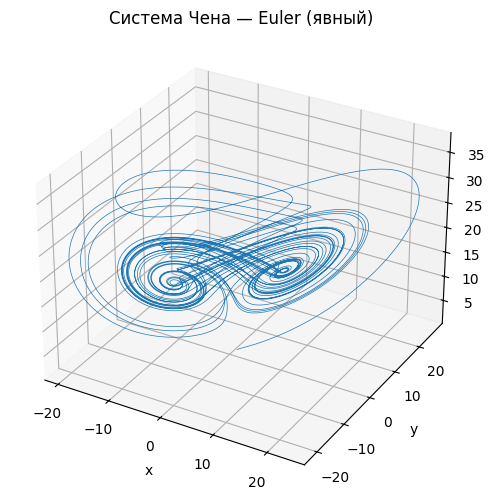

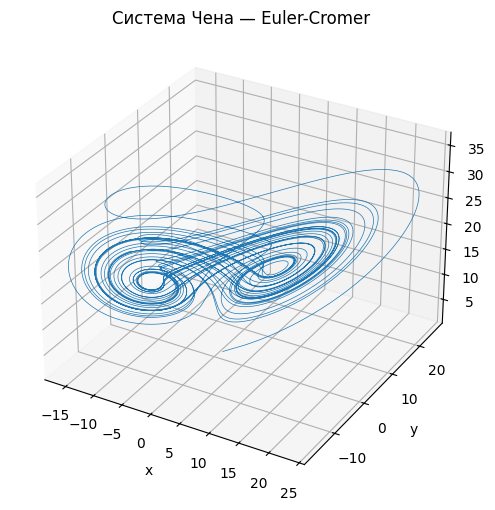

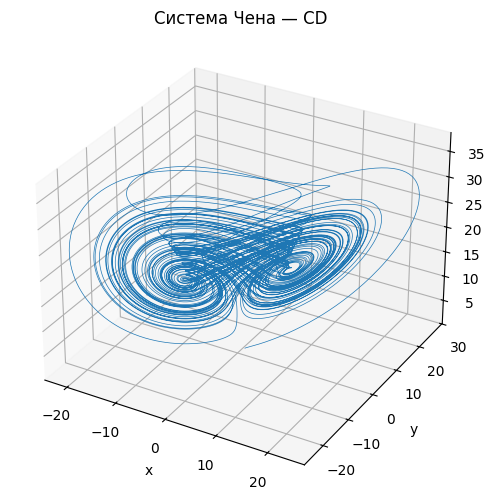

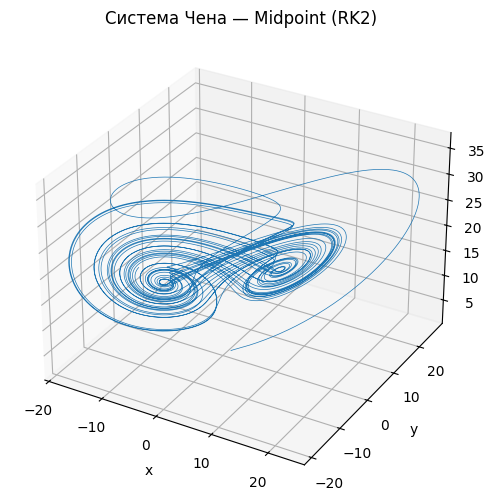

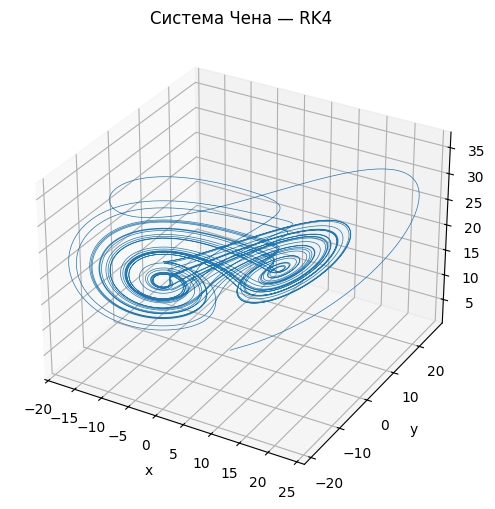

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -----------------------------
# параметры системы Чена
a, b, c = 40, 3, 28

def chen_system(x, y, z):
    dx = a * (y - x)
    dy = (c - a) * x - x * z + c * y
    dz = x * y - b * z
    return np.array([dx, dy, dz])

# -----------------------------
# явный Эйлер
def integrate_euler(x0, y0, z0, h, T):
    n_steps = int(T / h)
    xs, ys, zs = [x0], [y0], [z0]
    x, y, z = x0, y0, z0
    for _ in range(n_steps):
        dx, dy, dz = chen_system(x, y, z)
        x += h * dx
        y += h * dy
        z += h * dz
        xs.append(x); ys.append(y); zs.append(z)
    return np.array(xs), np.array(ys), np.array(zs)

# -----------------------------
# Эйлер-Кромер
def integrate_euler_cromer(x0, y0, z0, h, T):
    n_steps = int(T / h)
    xs, ys, zs = [x0], [y0], [z0]
    x, y, z = x0, y0, z0
    for _ in range(n_steps):
        dx, _, _ = chen_system(x, y, z)
        x_new = x + h * dx
        _, dy, _ = chen_system(x_new, y, z)
        y_new = y + h * dy
        _, _, dz = chen_system(x_new, y_new, z)
        z_new = z + h * dz
        x, y, z = x_new, y_new, z_new
        xs.append(x); ys.append(y); zs.append(z)
    return np.array(xs), np.array(ys), np.array(zs)

# -----------------------------
# CD-метод
def cd_step(x, y, z, h, a=40, b=3, c=28):
    # шаг D1
    x1 = (x + h * a * y) / (1 + h * a)
    y1 = (y + h * ((c - a) * x1 - x1 * z)) / (1 - h * c)
    z1 = (z + h * x1 * y1) / (1 + h * b)
    # шаг D2
    z2 = (z1 + h * x1 * y1) / (1 + h * b)
    y2 = (y1 + h * ((c - a) * x1 - x1 * z2)) / (1 - h * c)
    x2 = (x1 + h * a * y2) / (1 + h * a)
    return x2, y2, z2

def integrate_cd(x0, y0, z0, h, T):
    n_steps = int(T / h)
    xs, ys, zs = [x0], [y0], [z0]
    x, y, z = x0, y0, z0
    for _ in range(n_steps):
        x, y, z = cd_step(x, y, z, h, a, b, c)
        xs.append(x); ys.append(y); zs.append(z)
    return np.array(xs), np.array(ys), np.array(zs)

# -----------------------------
# метод средней точки (RK2)
def integrate_midpoint(x0, y0, z0, h, T):
    n_steps = int(T / h)
    xs, ys, zs = [x0], [y0], [z0]
    state = np.array([x0, y0, z0], dtype=float)
    for _ in range(n_steps):
        k1 = chen_system(*state)
        k2 = chen_system(*(state + 0.5*h*k1))
        state = state + h * k2
        xs.append(state[0]); ys.append(state[1]); zs.append(state[2])
    return np.array(xs), np.array(ys), np.array(zs)

# -----------------------------
# RK4
def integrate_rk4(x0, y0, z0, h, T):
    n_steps = int(T / h)
    xs, ys, zs = [x0], [y0], [z0]
    state = np.array([x0, y0, z0], dtype=float)
    for _ in range(n_steps):
        k1 = chen_system(*state)
        k2 = chen_system(*(state + 0.5*h*k1))
        k3 = chen_system(*(state + 0.5*h*k2))
        k4 = chen_system(*(state + h*k3))
        state = state + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        xs.append(state[0]); ys.append(state[1]); zs.append(state[2])
    return np.array(xs), np.array(ys), np.array(zs)

# -----------------------------
# построение 3D графика
def plot_3d(xs, ys, zs, title):
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(xs, ys, zs, lw=0.5)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title(title)
    plt.show()

# -----------------------------
# параметры моделирования
x0, y0, z0 = 1, 1, 1
h = 0.001
T = 30

# интеграции и графики
methods = {
    "Euler (явный)": integrate_euler,
    "Euler-Cromer": integrate_euler_cromer,
    "CD": integrate_cd,
    "Midpoint (RK2)": integrate_midpoint,
    "RK4": integrate_rk4
}

for name, solver in methods.items():
    xs, ys, zs = solver(x0, y0, z0, h, T)
    plot_3d(xs, ys, zs, f"Система Чена — {name}")


Метод: Euler
  h = 0.04 ... diverged/failed
  h = 0.02 ... diverged/failed
  h = 0.01 ... 

/tmp/ipython-input-1297580696.py:11: RuntimeWarning: overflow encountered in scalar multiply
  dy = (c - a) * x - x * z + c * y
/tmp/ipython-input-1297580696.py:12: RuntimeWarning: overflow encountered in scalar multiply
  dz = x * y - b * z
/tmp/ipython-input-1297580696.py:22: RuntimeWarning: invalid value encountered in add
  x = x + h * chen_system(x)
/tmp/ipython-input-1297580696.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  dx = a * (y - x)
/tmp/ipython-input-1297580696.py:11: RuntimeWarning: invalid value encountered in scalar add
  dy = (c - a) * x - x * z + c * y
/tmp/ipython-input-1297580696.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  dz = x * y - b * z


diverged/failed
  h = 0.005 ... rmse = 8.42577
  h = 0.0025 ... rmse = 9.66188
  h = 0.001 ... rmse = 9.18089
  h = 0.0005 ... rmse = 8.59427
Метод: Euler-Cromer
  h = 0.04 ... diverged/failed
  h = 0.02 ... 

/tmp/ipython-input-1297580696.py:11: RuntimeWarning: invalid value encountered in scalar subtract
  dy = (c - a) * x - x * z + c * y


rmse = 8.31446
  h = 0.01 ... rmse = 9.11088
  h = 0.005 ... rmse = 9.43086
  h = 0.0025 ... rmse = 8.66905
  h = 0.001 ... rmse = 8.29776
  h = 0.0005 ... rmse = 9.00718
Метод: CD
  h = 0.04 ... diverged/failed
  h = 0.02 ... diverged/failed
  h = 0.01 ... 

/tmp/ipython-input-1297580696.py:46: RuntimeWarning: overflow encountered in scalar multiply
  z1 = (z0 + h * x1 * y1) / (1 + h * b)
/tmp/ipython-input-1297580696.py:47: RuntimeWarning: overflow encountered in scalar multiply
  z2 = (z1 + h * x1 * y1) / (1 + h * b)
/tmp/ipython-input-1297580696.py:45: RuntimeWarning: invalid value encountered in scalar subtract
  y1 = (y0 + h * ((c - a) * x1 - x1 * z0)) / (1 - h * c)
/tmp/ipython-input-1297580696.py:48: RuntimeWarning: overflow encountered in scalar multiply
  y2 = (y1 + h * ((c - a) * x1 - x1 * z2)) / (1 - h * c)
/tmp/ipython-input-1297580696.py:45: RuntimeWarning: invalid value encountered in scalar add
  y1 = (y0 + h * ((c - a) * x1 - x1 * z0)) / (1 - h * c)


rmse = 49.1473
  h = 0.005 ... rmse = 8.89153
  h = 0.0025 ... rmse = 9.02914
  h = 0.001 ... rmse = 9.23532
  h = 0.0005 ... rmse = 8.55371
Метод: Midpoint (RK2)
  h = 0.04 ... diverged/failed
  h = 0.02 ... rmse = 9.15644
  h = 0.01 ... rmse = 8.58313
  h = 0.005 ... rmse = 8.23331
  h = 0.0025 ... rmse = 7.89712
  h = 0.001 ... rmse = 8.14989
  h = 0.0005 ... rmse = 8.06838
Метод: RK4
  h = 0.04 ... rmse = 8.65871
  h = 0.02 ... rmse = 8.30953
  h = 0.01 ... rmse = 7.39047
  h = 0.005 ... rmse = 7.83448
  h = 0.0025 ... rmse = 7.91789
  h = 0.001 ... rmse = 7.89359
  h = 0.0005 ... rmse = 6.69792

Таблица RMSE:
method         CD     Euler  Euler-Cromer  Midpoint (RK2)       RK4
h                                                                  
0.0005   8.553708  8.594268      9.007178        8.068377  6.697920
0.0010   9.235320  9.180890      8.297761        8.149887  7.893595
0.0025   9.029144  9.661884      8.669050        7.897124  7.917886
0.0050   8.891528  8.425774      9.430

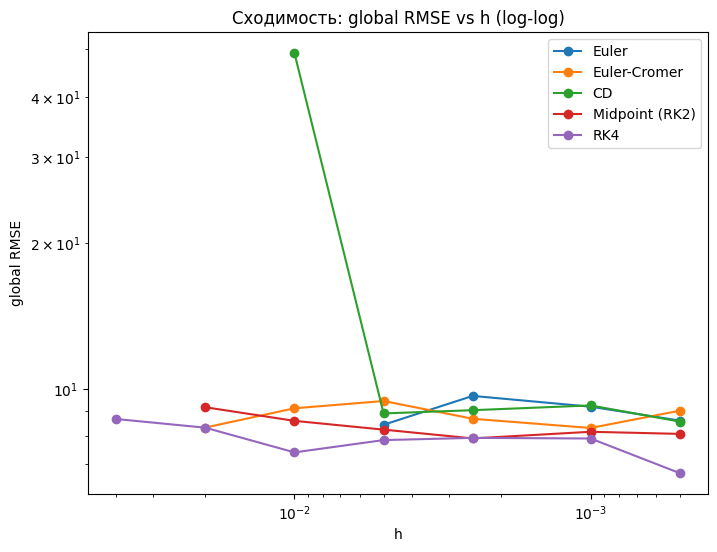

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# параметры Chen
a, b, c = 40.0, 3.0, 28.0

def chen_system(state):
    x, y, z = state
    dx = a * (y - x)
    dy = (c - a) * x - x * z + c * y
    dz = x * y - b * z
    return np.array([dx, dy, dz], dtype=float)

# интеграторы (возвращают traj shape (N+1,3))
def integrate_euler(x0, h, T):
    n = int(np.floor(T / h))
    traj = np.empty((n+1,3), dtype=float)
    traj[0] = x0.copy()
    x = x0.copy()
    for i in range(1, n+1):
        x = x + h * chen_system(x)
        traj[i] = x
    return traj

def integrate_euler_cromer(x0, h, T):
    n = int(np.floor(T / h))
    traj = np.empty((n+1,3), dtype=float)
    x, y, z = x0.copy()
    traj[0] = [x,y,z]
    for i in range(1, n+1):
        dx, _, _ = chen_system([x,y,z])
        x_new = x + h*dx
        _, dy, _ = chen_system([x_new, y, z])
        y_new = y + h*dy
        _, _, dz = chen_system([x_new, y_new, z])
        z_new = z + h*dz
        x, y, z = x_new, y_new, z_new
        traj[i] = [x,y,z]
    return traj

def cd_step_vec(x, h):
    x0, y0, z0 = x
    x1 = (x0 + h * a * y0) / (1 + h * a)
    y1 = (y0 + h * ((c - a) * x1 - x1 * z0)) / (1 - h * c)
    z1 = (z0 + h * x1 * y1) / (1 + h * b)
    z2 = (z1 + h * x1 * y1) / (1 + h * b)
    y2 = (y1 + h * ((c - a) * x1 - x1 * z2)) / (1 - h * c)
    x2 = (x1 + h * a * y2) / (1 + h * a)
    return np.array([x2, y2, z2], dtype=float)

def integrate_cd(x0, h, T):
    n = int(np.floor(T / h))
    traj = np.empty((n+1,3), dtype=float)
    x = x0.copy()
    traj[0] = x.copy()
    for i in range(1, n+1):
        x = cd_step_vec(x, h)
        traj[i] = x
    return traj

def integrate_midpoint(x0, h, T):
    n = int(np.floor(T / h))
    traj = np.empty((n+1,3), dtype=float)
    x = x0.copy()
    traj[0] = x.copy()
    for i in range(1, n+1):
        k1 = chen_system(x)
        k2 = chen_system(x + 0.5*h*k1)
        x = x + h * k2
        traj[i] = x
    return traj

def integrate_rk4(x0, h, T):
    n = int(np.floor(T / h))
    traj = np.empty((n+1,3), dtype=float)
    x = x0.copy()
    traj[0] = x.copy()
    for i in range(1, n+1):
        k1 = chen_system(x)
        k2 = chen_system(x + 0.5*h*k1)
        k3 = chen_system(x + 0.5*h*k2)
        k4 = chen_system(x + h*k3)
        x = x + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        traj[i] = x
    return traj

# сравнение метод+реф (эталон = тот же метод с шагом h/10)
def compare_self(integrator, x0, h, T):
    try:
        traj = integrator(x0, h, T)
    except Exception as e:
        return None
    # эталон
    h_ref = h / 10.0
    try:
        traj_ref = integrator(x0, h_ref, T)
    except Exception:
        return None
    # если размеры не кратны 10 (вызовет проблему), сделаем выборку ближайших:
    factor = int(round(h / h_ref))
    if factor <= 0: factor = 1
    # убедимся, что traj_ref имеет длину = factor * (len(traj)-1) + 1
    if traj_ref.shape[0] < factor * (traj.shape[0]-1) + 1:
        # если не хватает точек (погрешности округления), пересчитаем референс с точным n
        n = traj.shape[0] - 1
        exact_h_ref = (T) / (factor * n)
        traj_ref = integrator(x0, exact_h_ref, T)
    traj_ref_sampled = traj_ref[::factor]
    if traj_ref_sampled.shape[0] != traj.shape[0]:
        # подрезаем/дополняем минимально
        m = min(traj_ref_sampled.shape[0], traj.shape[0])
        traj = traj[:m]
        traj_ref_sampled = traj_ref_sampled[:m]
    # проверка на NaN/inf
    if not np.all(np.isfinite(traj)) or not np.all(np.isfinite(traj_ref_sampled)):
        return None
    diff = traj - traj_ref_sampled
    global_rmse = np.sqrt(np.mean(diff**2))
    return global_rmse

if __name__ == "__main__":
    x0 = np.array([1.0,1.0,1.0], dtype=float)
    T = 30.0
    h_list = [0.04, 0.02, 0.01, 0.005, 0.0025, 0.001, 0.0005]

    methods = {
        "Euler": integrate_euler,
        "Euler-Cromer": integrate_euler_cromer,
        "CD": integrate_cd,
        "Midpoint (RK2)": integrate_midpoint,
        "RK4": integrate_rk4
    }

    records = []
    for name, integrator in methods.items():
        rmses = []
        hs_ok = []
        print(f"Метод: {name}")
        for h in h_list:
            print(f"  h = {h} ... ", end="", flush=True)
            rmse = compare_self(integrator, x0, h, T)
            if rmse is None or not np.isfinite(rmse):
                print("diverged/failed")
                rmses.append(np.nan)
            else:
                print(f"rmse = {rmse:.6g}")
                rmses.append(rmse)
                hs_ok.append(h)
        records.append((name, np.array(h_list), np.array(rmses)))

    # Таблица RMSE
    table = []
    for name, hs, rmses in records:
        for h, r in zip(hs, rmses):
            table.append([name, h, r])
    df = pd.DataFrame(table, columns=["method","h","global_rmse"])
    print("\nТаблица RMSE:")
    print(df.pivot(index="h", columns="method", values="global_rmse").to_string())

    # график (по каждому методу)
    plt.figure(figsize=(8,6))
    for name, hs, rmses in records:
        # только конечные точки
        mask = np.isfinite(rmses)
        if np.sum(mask) < 2:
            continue
        plt.loglog(hs[mask], rmses[mask], '-o', label=name)
    plt.gca().invert_xaxis()
    plt.xlabel("h")
    plt.ylabel("global RMSE")
    plt.title("Сходимость: global RMSE vs h (log-log)")
    plt.legend()
    plt.show()